## 多分类问题中的混淆矩阵

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=666)

In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9408901251738526

In [15]:
y_predict = log_reg.predict(X_test)

In [17]:
from sklearn.metrics import precision_score
# 针对多分类问题
precision_score(y_test, y_predict, average='micro')

0.9408901251738526

### 混淆矩阵天然解决多分类问题

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[148,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0, 125,   2,   0,   0,   0,   0,   3,   2,  11],
       [  0,   1, 134,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   1, 138,   0,   5,   0,   1,   4,   0],
       [  2,   4,   0,   0, 138,   0,   1,   3,   0,   2],
       [  1,   2,   1,   0,   0, 146,   1,   0,   0,   1],
       [  0,   2,   0,   0,   0,   1, 132,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 135,   0,   1],
       [  0,   8,   2,   1,   3,   3,   0,   1, 120,   2],
       [  0,   1,   0,   6,   0,   1,   0,   1,   1, 137]], dtype=int64)

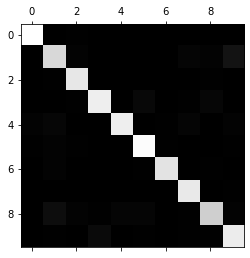

In [19]:
cfm = confusion_matrix(y_test, y_predict)
plt.matshow(cfm, cmap=plt.cm.gray)
plt.show()

In [23]:
rows_sum = np.sum(cfm, axis=1)
err_matrix = cfm / rows_sum
np.fill_diagonal(err_matrix, 0) # 把对角线的位置填为0
err_matrix

array([[0.        , 0.        , 0.00735294, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.01470588, 0.        , 0.        ,
        0.        , 0.        , 0.02205882, 0.01428571, 0.07482993],
       [0.        , 0.00699301, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00714286, 0.        ],
       [0.        , 0.        , 0.00735294, 0.        , 0.        ,
        0.03289474, 0.        , 0.00735294, 0.02857143, 0.        ],
       [0.01342282, 0.02797203, 0.        , 0.        , 0.        ,
        0.        , 0.00735294, 0.02205882, 0.        , 0.01360544],
       [0.00671141, 0.01398601, 0.00735294, 0.        , 0.        ,
        0.        , 0.00735294, 0.        , 0.        , 0.00680272],
       [0.        , 0.01398601, 0.        , 0.        , 0.        ,
        0.00657895, 0.        , 0.        , 0.00714286, 0.        ],
       [0.        , 0.        , 0.       

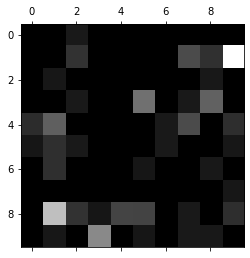

In [24]:
plt.matshow(err_matrix, cmap=plt.cm.gray) # 越亮的地方犯错越多
plt.show()